In [1]:
%matplotlib notebook
import matplotlib.ticker as ticker
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'


excel_file = "1990-2019_annual_GENERATION_state.xls"

power_gen_df = pd.read_excel(excel_file)

power_gen_df.head()

,State Historical Tables for 2019\nReleased: September 2020\nNext Update: November 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261


In [2]:
#Rename Columns
pow_gen_df = power_gen_df.rename(columns={"State Historical Tables for 2019\nReleased: September 2020\nNext Update: November 2021":"Year", "Unnamed: 1":"State", 
                                          "Unnamed: 2":"Type of Producer", "Unnamed: 3":"Energy source", "Unnamed: 4":"Generation(Megawhatthours)"})
pow_gen_df.head()

,Year,State,Type of Producer,Energy source,Generation(Megawhatthours)
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261


In [3]:
#Clean data so it shows only 2013-2019, Total Electric Power Industry, and Solar Power

pow_gen = pow_gen_df.iloc[1:]
p_g = pow_gen.loc[:, ["Year", "State", "Type of Producer","Energy source", "Generation(Megawhatthours)"]]
p_g =p_g.loc[(p_g["Year"] > 2012)]
p_g_solar = p_g.loc[p_g["Energy source"] == "Solar Thermal and Photovoltaic"]
pgs_total =  p_g_solar.loc[p_g_solar["Type of Producer"] == "Total Electric Power Industry"]
pgs_total


,Year,State,Type of Producer,Energy source,Generation(Megawhatthours)
39336,2013,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,2.11144e+06
39374,2013,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,3.81372e+06
39434,2013,CO,Total Electric Power Industry,Solar Thermal and Photovoltaic,248452
39480,2013,CT,Total Electric Power Industry,Solar Thermal and Photovoltaic,0
39522,2013,DE,Total Electric Power Industry,Solar Thermal and Photovoltaic,44727
...,...,...,...,...,...
53537,2019,VA,Total Electric Power Industry,Solar Thermal and Photovoltaic,949111
53583,2019,VT,Total Electric Power Industry,Solar Thermal and Photovoltaic,147287
53616,2019,WA,Total Electric Power Industry,Solar Thermal and Photovoltaic,43728
53658,2019,WI,Total Electric Power Industry,Solar Thermal and Photovoltaic,37892


In [4]:
#Create Data Frame for 2019
pgs_2019 =  pgs_total.loc[(pgs_total["Year"] == 2019)]
pgs_2019["Generation(Megawhatthours)"] = pd.to_numeric(pgs_2019["Generation(Megawhatthours)"])
pgs_2019_clean = pgs_2019.drop([53426])
pgs_2019_clean

,Year,State,Type of Producer,Energy source,Generation(Megawhatthours)
51676,2019,AL,Total Electric Power Industry,Solar Thermal and Photovoltaic,384939
51712,2019,AR,Total Electric Power Industry,Solar Thermal and Photovoltaic,210333
51752,2019,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,5278019
51790,2019,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,28331513
51850,2019,CO,Total Electric Power Industry,Solar Thermal and Photovoltaic,1218220
51898,2019,CT,Total Electric Power Industry,Solar Thermal and Photovoltaic,138453
51934,2019,DC,Total Electric Power Industry,Solar Thermal and Photovoltaic,8829
51947,2019,DE,Total Electric Power Industry,Solar Thermal and Photovoltaic,53807
51980,2019,FL,Total Electric Power Industry,Solar Thermal and Photovoltaic,3901445
52027,2019,GA,Total Electric Power Industry,Solar Thermal and Photovoltaic,2160770


<IPython.core.display.Javascript object>


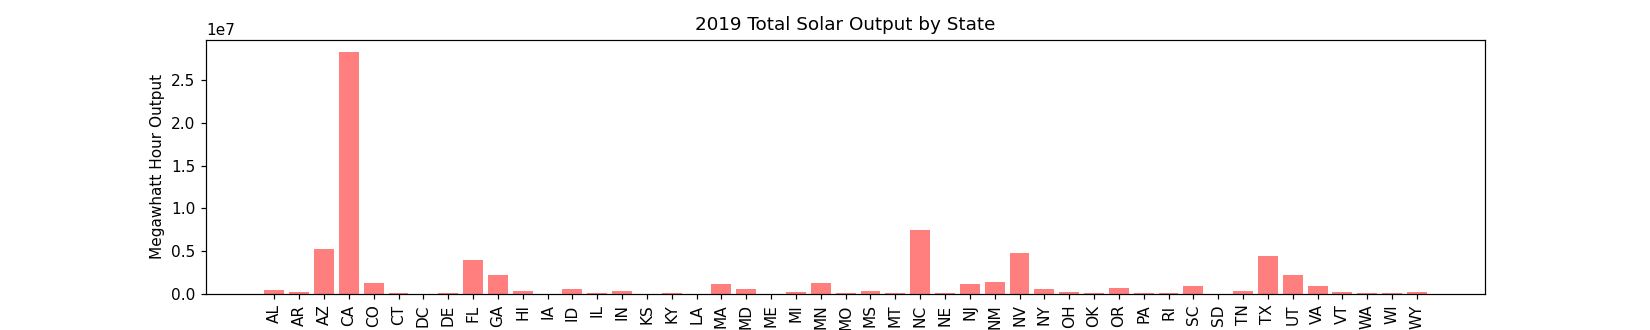

Text(0, 0.5, 'Megawhatt Hour Output')

In [24]:
x_axis = np.arange(len(pgs_2019_clean))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(15,3))
plt.bar(x_axis,pgs_2019_clean["Generation(Megawhatthours)"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, pgs_2019_clean["State"], rotation="vertical")


plt.title("2019 Total Solar Output by State")
plt.xlabel("State")
plt.ylabel("Megawhatt Hour Output")



In [25]:
plt.savefig("2019_Total_Solar_Output_by_State.png")
